    pos angle           ang dist     
------------------ ------------------
145.03546678680166  3.520320305643236
 66.66035010943045 15.042659220082939
 66.33648188058521 14.971316228404534
 66.77641196936187 14.847734838443298
 65.85614462247983 14.670725220881481
  65.3553166784597 15.191193053788915
62.597504749192204 13.910819959166728
 60.75054627905684 10.827895825772456
57.720135429755906  6.229971370723204
15.809240362666163  2.080397758330698
289.38133529279537 4.7021441227118075
 279.1991571078875  8.615151483397451
280.08129643450707  9.045743887525676
 282.6120887157758 11.968139444421524
281.75964788275195 12.666712641565729
 285.7962246290188 15.590512239988437


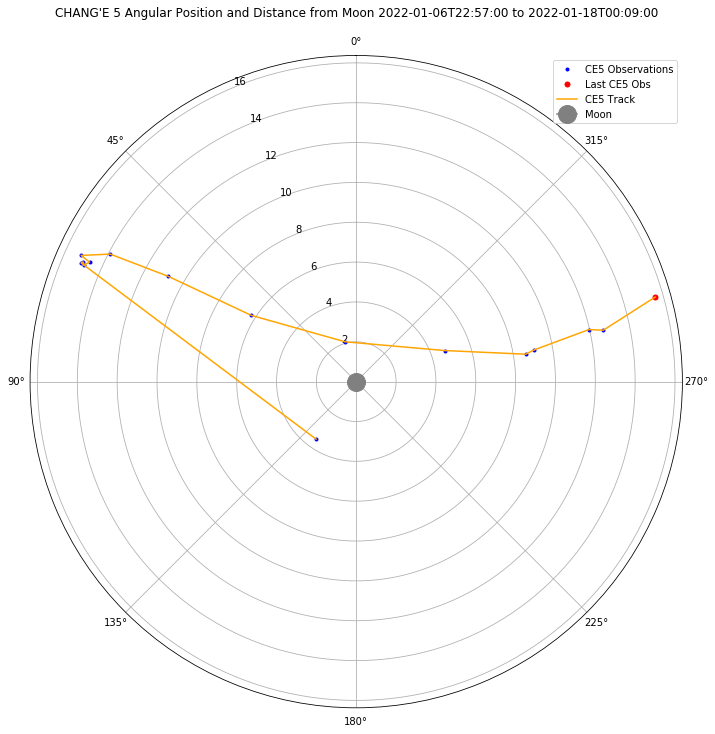

In [1]:
#!/usr/bin/env python3
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.coordinates as coord

from astropy.table import QTable, Table, Column
from astropy.time import Time
from astropy.io import ascii
from astropy.coordinates import SkyCoord, EarthLocation, get_moon, GCRS

plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams['figure.facecolor'] = 'w'

tbl = ascii.read("/home/scott/Dropbox/satobs/ce5/CE5_DRO_obs.txt")

op_tbl = QTable(names=('pos angle', 'ang dist'), dtype=('f8', 'f8'))

if __name__ == "__main__":
    loc = EarthLocation(lat=46.28993*u.deg, lon=-72.4048408*u.deg, height=100*u.m)
    
i = 0
while i < len(tbl):
    current_row = tbl[i]
    ra = coord.Angle(current_row["ra"], unit=u.hour)
    dec = coord.Angle(current_row["dec"], unit=u.degree)
    t =  Time(current_row["time"], format="isot", scale="utc")
    pmoon = get_moon(t, location=loc)
    psat = SkyCoord(ra, dec, unit=("hourangle", "deg"), frame="icrs")
    
    p_offset = pmoon.position_angle(psat).to(u.deg)   
    psat = GCRS(ra=psat.ra, dec=psat.dec, obstime=t,
                obsgeoloc=pmoon.obsgeoloc, obsgeovel=pmoon.obsgeovel)
    a_sep = pmoon.separation(psat)
    op_tbl.add_row([p_offset,a_sep])
    i += 1  

print(op_tbl)

t_min = tbl[0]["time"]
t_max = tbl[len(tbl)-1]["time"]

plt.clf()
sp = plt.subplot(1, 1, 1, projection='polar')
sp.set_theta_zero_location('N')
sp.set_theta_direction(1)
plt.plot(op_tbl["pos angle"]*(np.pi/180),op_tbl["ang dist"], 'g.', color = 'blue', label = 'CE5 Observations')
plt.plot(op_tbl[len(op_tbl)-1]["pos angle"]*(np.pi/180),op_tbl[len(op_tbl)-1]["ang dist"],'g.',markersize=10,  color = 'red', label = 'Last CE5 Obs')
plt.plot(op_tbl["pos angle"]*(np.pi/180),op_tbl["ang dist"], color = 'orange', label='CE5 Track')
plt.plot(0,0,marker='o', markersize=18, color = 'gray', label = 'Moon')
plt.title('CHANG\'E 5 Angular Position and Distance from Moon %s to %s'%(t_min,t_max))
plt.legend()
plt.show()
